In [4]:
%load_ext autoreload
%autoreload 2
%aimport -fenics
%aimport -numpy 
%aimport -matplotlib
from fenics import *
import settings
import solution_io
import numpy as np
import matplotlib.pyplot as plt
import crosssection


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
#run experiments
experiments = []
experiments += [settings.experiment()]
experiments += [settings.experiment(name='wider_icestream',icestream_width=20100)]
#experiments += [settings.experiment(name='softer_margin',shearmargin_enhancement=9)]
experiments += [settings.experiment(name='softer_margin_9000',shearmargin_enhancement=9,shearmargin_enhancement_pos=9000)]
experiments += [settings.experiment(name='softer_margin_9200',shearmargin_enhancement=9,shearmargin_enhancement_pos=9200)]
experiments += [settings.experiment(name='thicker_icestream',domain_h=1100)]

for experiment in experiments:
    print(experiment['name'])
    crosssection.run_experiment(experiment)

control

Running 2d experiment:  control
{}
Solving linear variational problem.
Solving nonlinear variational problem.
  Newton solver finished in 3 iterations and 3 linear solver iterations.
saving to  ../output//2d_control.h5
wider_icestream

Running 2d experiment:  wider_icestream
{'icestream_width': 20010, 'name': 'wider_icestream'}
Solving linear variational problem.
Solving nonlinear variational problem.
  Newton solver finished in 3 iterations and 3 linear solver iterations.
saving to  ../output//2d_wider_icestream.h5
softer_margin_9000

Running 2d experiment:  softer_margin_9000
{'name': 'softer_margin_9000',
 'shearmargin_enhancement': 9,
 'shearmargin_enhancement_pos': 9000}
Solving linear variational problem.
Solving nonlinear variational problem.
  Newton solver finished in 3 iterations and 3 linear solver iterations.
saving to  ../output//2d_softer_margin_9000.h5
softer_margin_9200

Running 2d experiment:  softer_margin_9200
{'name': 'softer_margin_9200',
 'shearmargin_enh

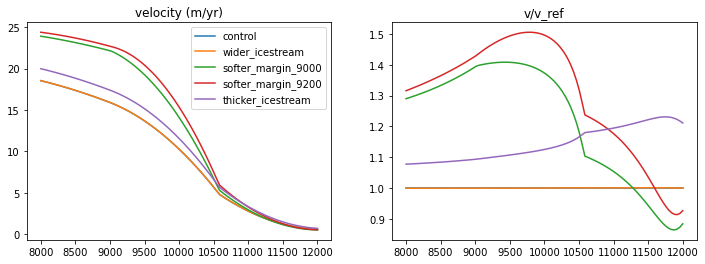

In [7]:

yr2sec = 365.25*24*60*60




#experiments[-1]
x= np.linspace(-50e3/2,50e3/2,100)
x= np.linspace(8e3,12e3,100)
def loadex(experiment):
    fname = settings.filename2d(experiment)
    results = solution_io.load_solution(fname)
    #mesh = results['mesh']
    usol = results['u']
    vfun = usol.sub(2)
    #psol = results['p']
    experiment = results['experiment']
    domain_h = experiment["domain_h"]
    v = np.empty(x.shape)
    for ix in range(len(x)):
        v[ix] = vfun(np.abs(x[ix]),domain_h)
    return v


v0 = loadex(experiments[0])

plt.rcParams['figure.figsize']=(12,4)
f,ax = plt.subplot_mosaic('AB')
for experiment in experiments:
    v = loadex(experiment)
    ax['A'].plot(x,v*yr2sec,label=experiment['name'])
    ax['B'].plot(x,v/v0,label=experiment['name'])


ax['A'].legend()
ax['A'].set_title('velocity (m/yr)')
ax['B'].set_title('v/v_ref');